# Import libraries 

In [31]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer


from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# **EDA**

In [32]:
#just specify the local directory
#or use cd to change to the respective directory for the code to fetch the file properly
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [33]:
column_list = (list(df.columns))
print(column_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [34]:
#Observe data type for each feature

print("Data types of the columns in the data frame:", df.dtypes)
print("=============================================")
print("Information about the data frame:", df.info())
print("=============================================")
print("Shape of the data frame:", df.shape)

df.head()

Data types of the columns in the data frame: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


# **Checking Missing Values**

In [35]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.000000
V16,0,0.000000
Amount,0,0.000000
V28,0,0.000000
V27,0,0.000000
V26,0,0.000000
V25,0,0.000000
V24,0,0.000000
V23,0,0.000000
V22,0,0.000000


**We can see that there is no missing value present in the dataframe.**



# **Outliers treatment**

The entire dataset undergoes PCA transformation, and it is assumed that outliers have been addressed. Consequently, no outlier treatment is applied to the dataframe, despite the presence of outliers being observed.




---



# **Classes Distribution**

In [36]:


classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

print("==============================================")


classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_transaction_share=",normal_share,"\n","Fraud_transaction_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %
 Normal_transaction_share= 99.82725143693798 
 Fraud_transaction_share= 0.1727485630620034
 Imbalance Percentage = 0.173047500131896


<Figure size 2000x600 with 0 Axes>

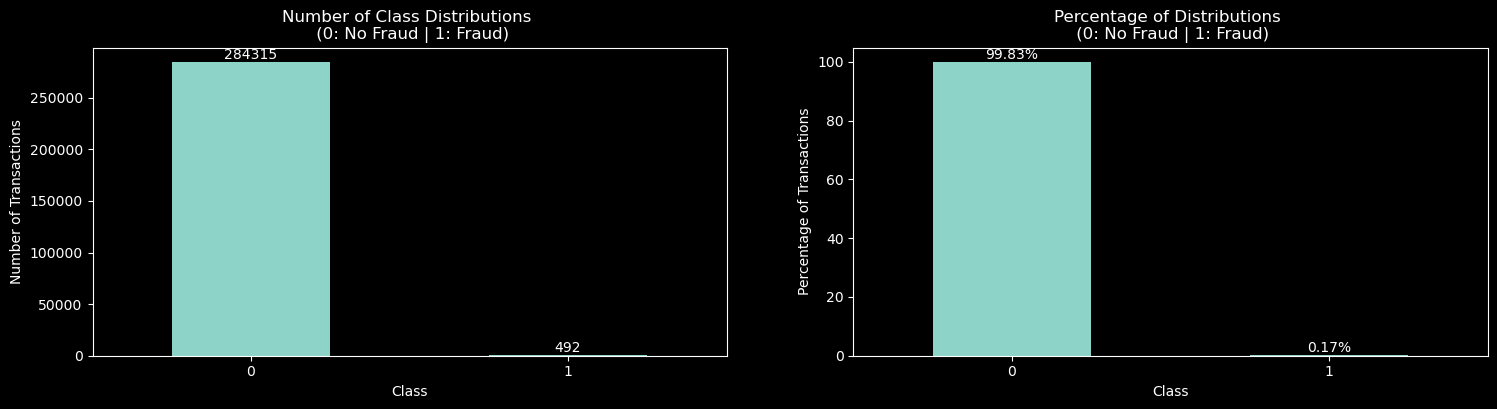

In [40]:



with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='m')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')
    
    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')
    
    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()


 ## Observation

* A significant class imbalance is present in the dataset, with only 492 out of 284,807 records labeled as fraudulent transactions.
* The distribution percentage for the majority class is 99.83%, while the minority class constitutes only 0.17% of the dataset.

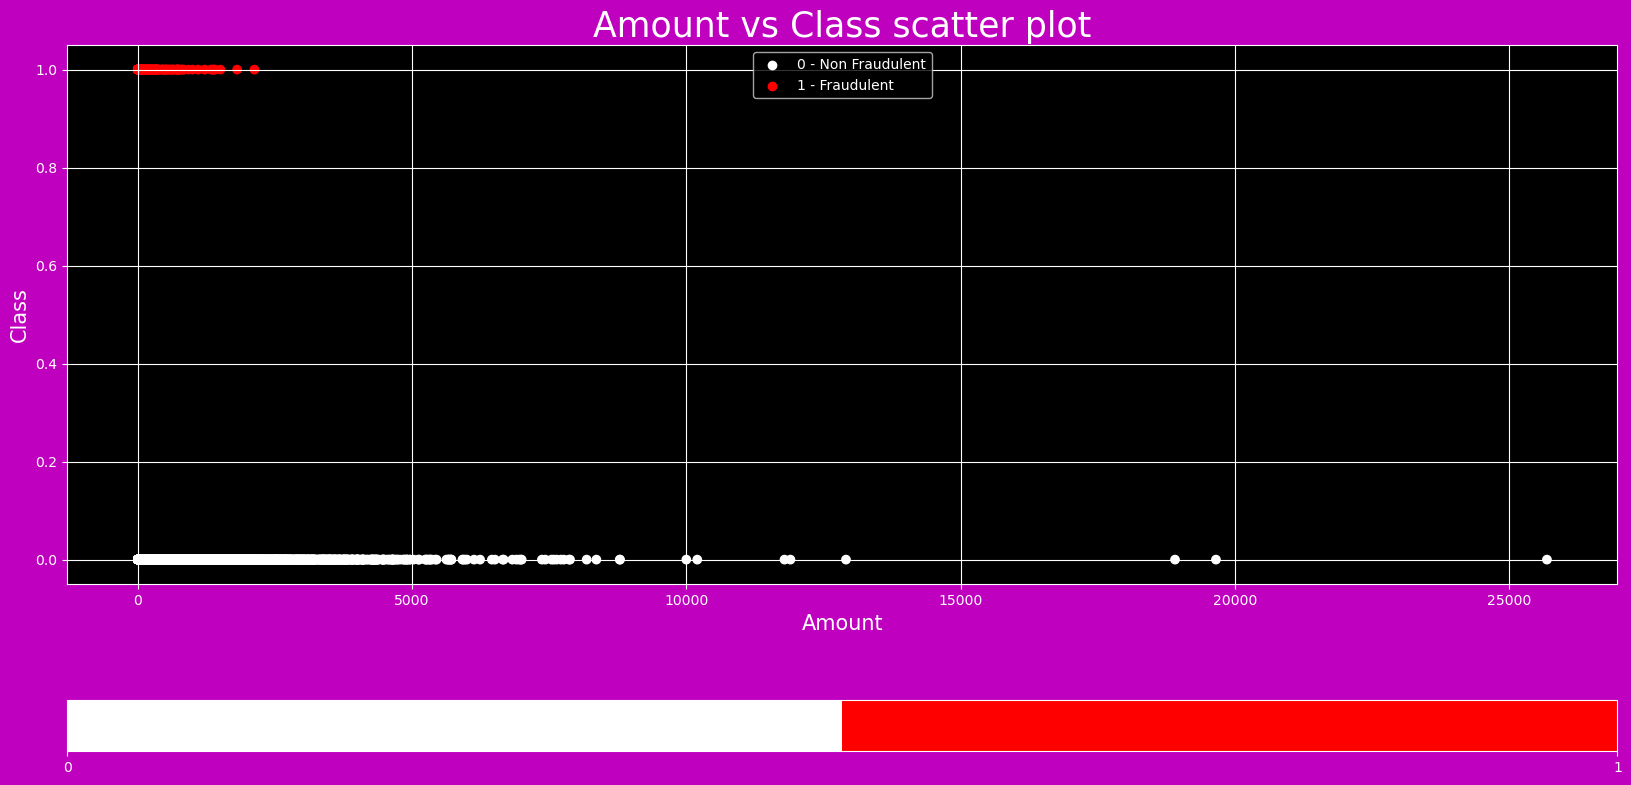

In [8]:
"""
Creates a scatter plot of Amount vs Class with color-coded points and a legend.


"""


cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10), facecolor='m')

    # Use the cmap parameter to color-code the points
    plt.scatter(x=df["Amount"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Amount vs Class scatter plot", fontsize=25)
    plt.ylabel("Class", fontsize=15)
    plt.xlabel("Amount", fontsize=15)
    plt.grid()

    # Create a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

 ## Observation

  * Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

<Figure size 640x480 with 0 Axes>

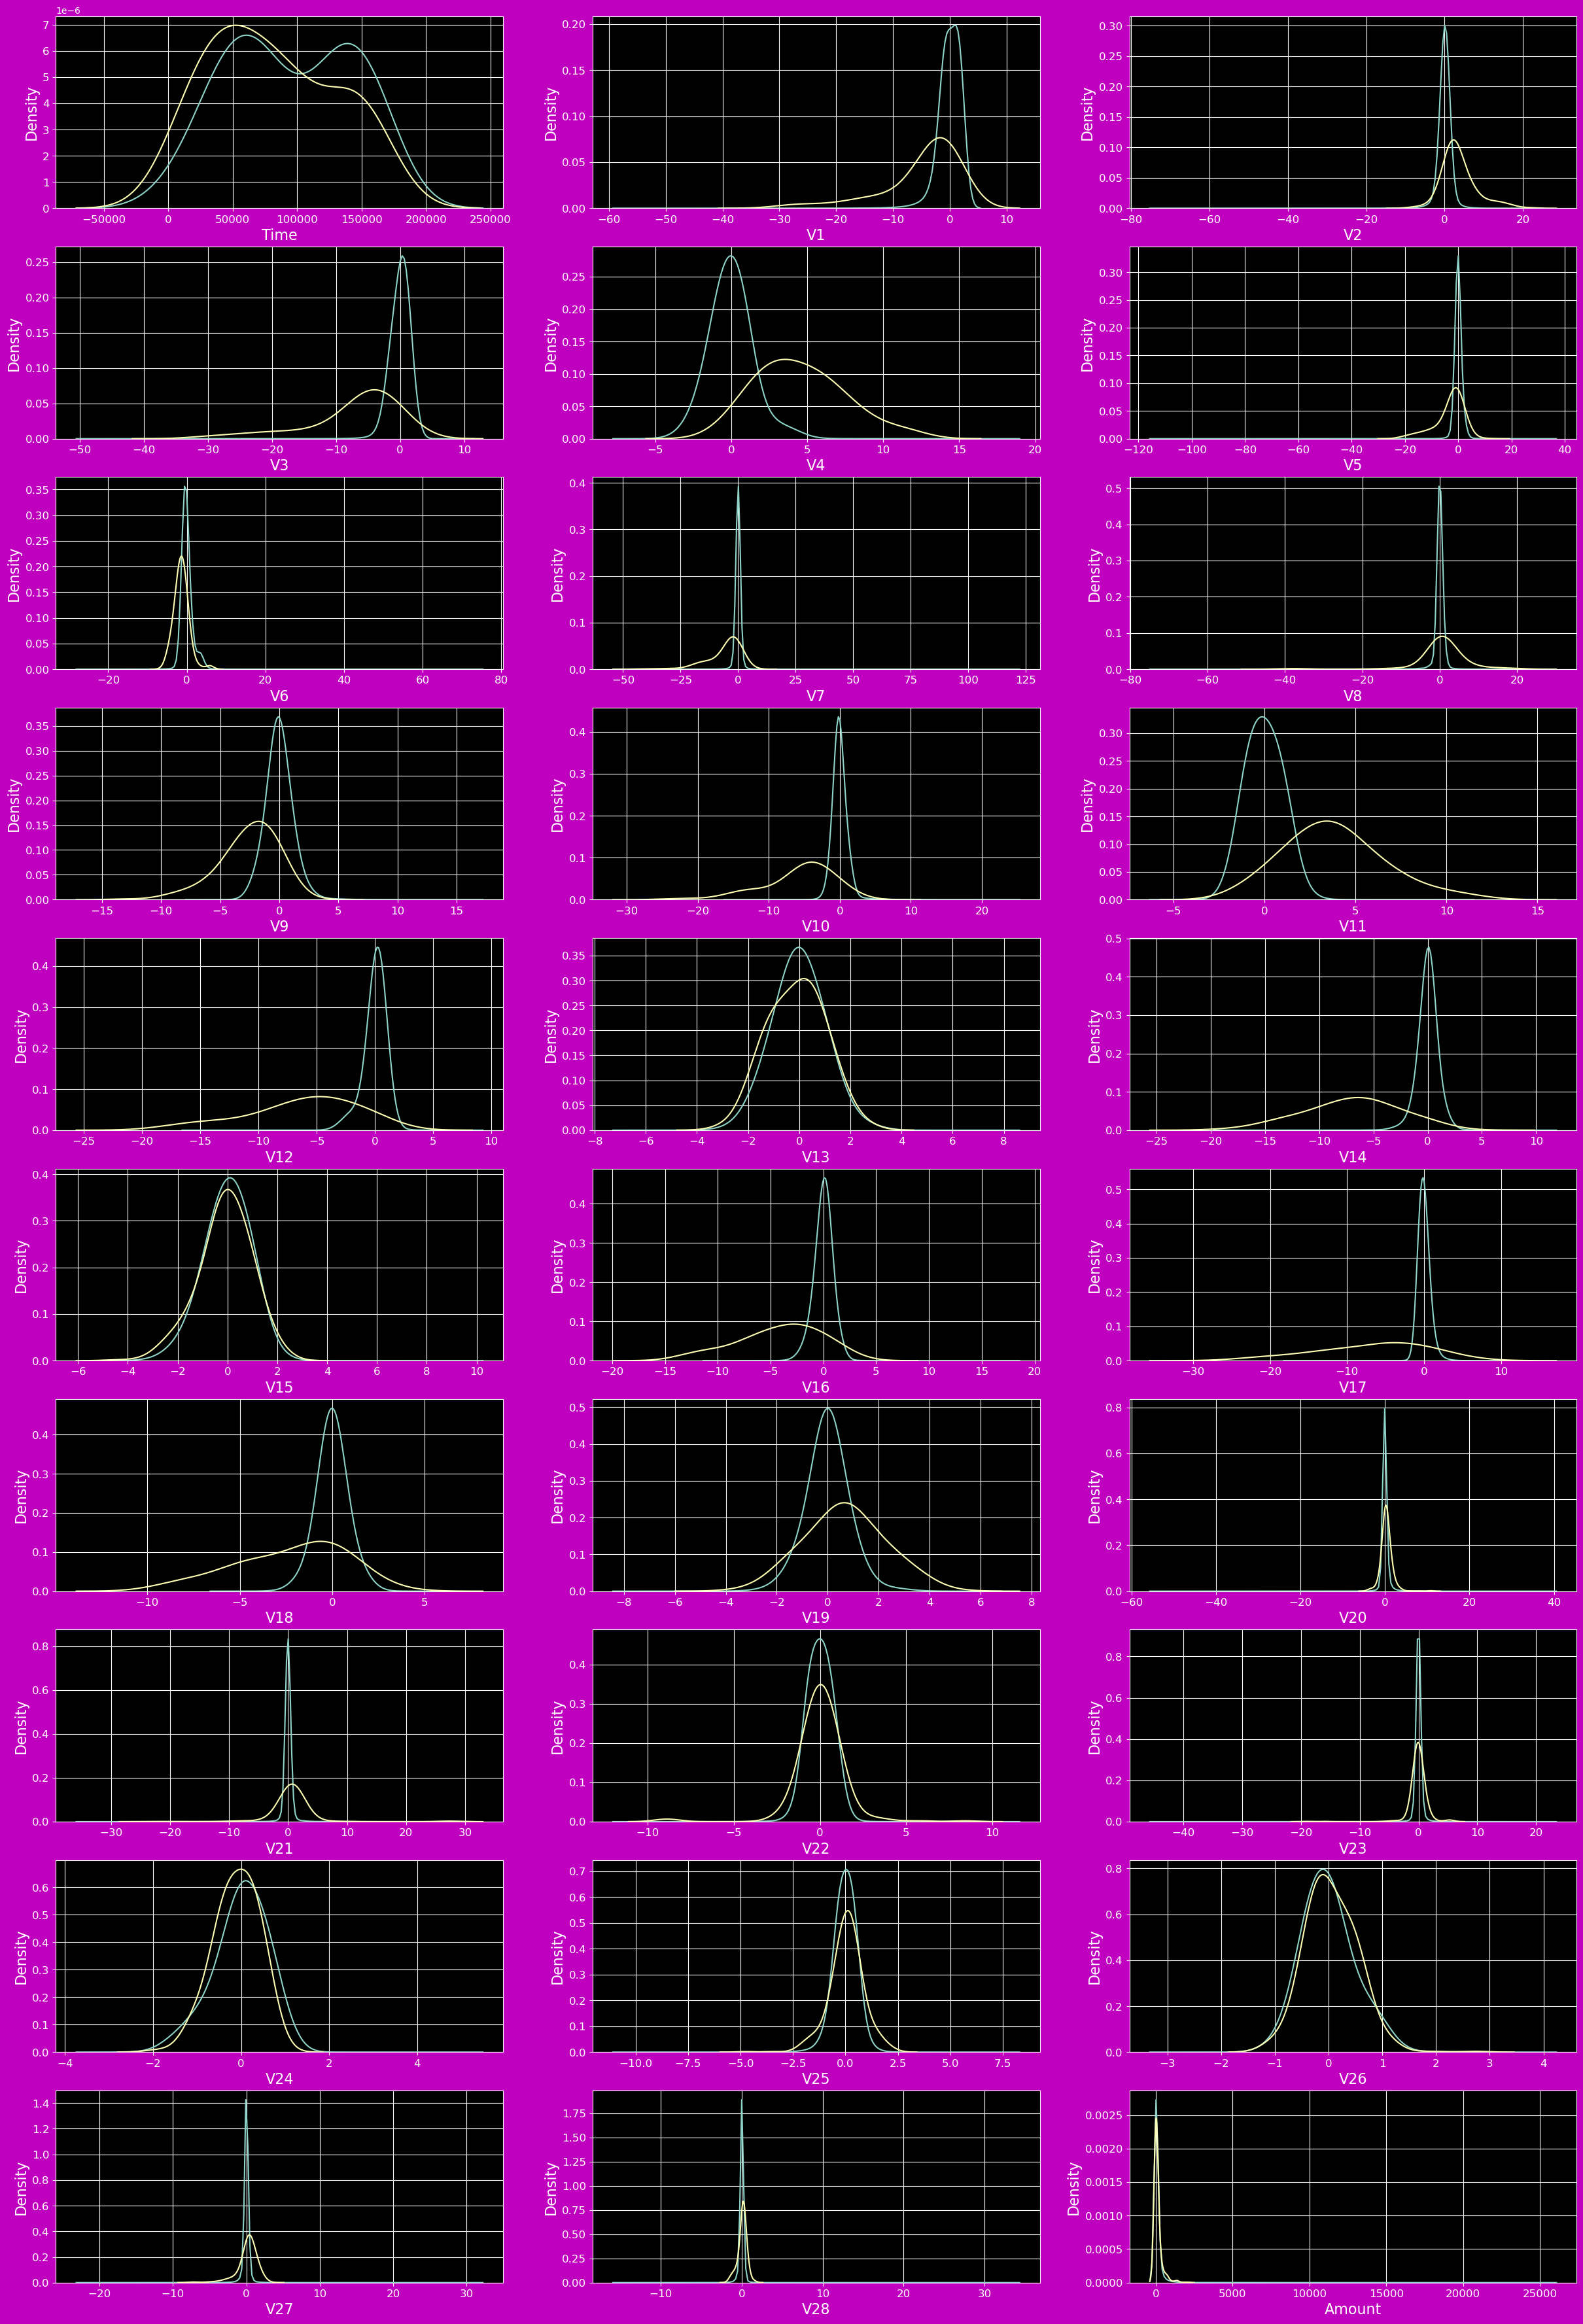

In [9]:
"""
Visualize the distribution of variables in a DataFrame using density plots.


"""

# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

with plt.style.context('dark_background'):

    plt.figure()
    fig, ax = plt.subplots(10,3,figsize=(30,45), facecolor='m');

    for feature in var:
        i += 1
        plt.subplot(10,3,i)
        sns.kdeplot(t0[feature], bw=0.5,label="0")
        sns.kdeplot(t1[feature], bw=0.5,label="1")
        plt.xlabel(feature, fontsize=16)
        plt.ylabel("Density", fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
    plt.show()

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.



# **Banking Business**

Dropping `Time` column as this feature is not going to help in the model building.



In [8]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


# **Splitting the data into train & test data**

In [41]:
# y= #class variable
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 30))

In [42]:
# from sklearn import model_selection
# X_train, X_test, y_train, y_test = 

"""
This code is using the train_test_split() function from scikit-learn to split the dataset X and its corresponding labels y into training and testing sets. The split is done with a 80/20 ratio for the test set and the random state is set to 42 for reproducibility. 
The stratify parameter is set to y, which means that the split is done in a way that preserves the proportion of samples for each class in y in the training and testing sets.
The resulting output of this code is a tuple containing the shape of the training set (X_train and y_train) and the shape of the testing set (X_test and y_test).
The train_test_split() function is commonly used in machine learning to split a dataset into training and testing sets to evaluate the performance of a model on unseen data. 
The training set is used to fit the model while the testing set is used to evaluate the model's performance on new, unseen data.
"""

# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [43]:
# Checking the split of the class label
print(" Fraudulent Count for Full data : ",np.sum(y))
print(" Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
 Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


#### Preserve X_test & y_test to evaluate on the test data once you build the model

In [44]:
# Save the testing set for evaluation
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


# **Feature Scaling using Robust  Scaler**

We need to scale `Amount` column.



In [13]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [14]:
X_train.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [15]:

X_test.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.013918
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.141267
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.752540
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.292415
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.285317


# **Checking Skewness** 

### Plotting the distribution of a variable
* #### Plotting the distribution of a variable to handle skewness
  * Skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Meadian and Mode are equal. The normal distribution has a skewness of 0. Skewness tell us about distribution of our data.
  * **Effects of skewed data**: Degrades the model's ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values. ie right skewed data will predict better on data points with lower value as compared to those with higher values.

* If there is skewness present in the distribution use:
  * Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

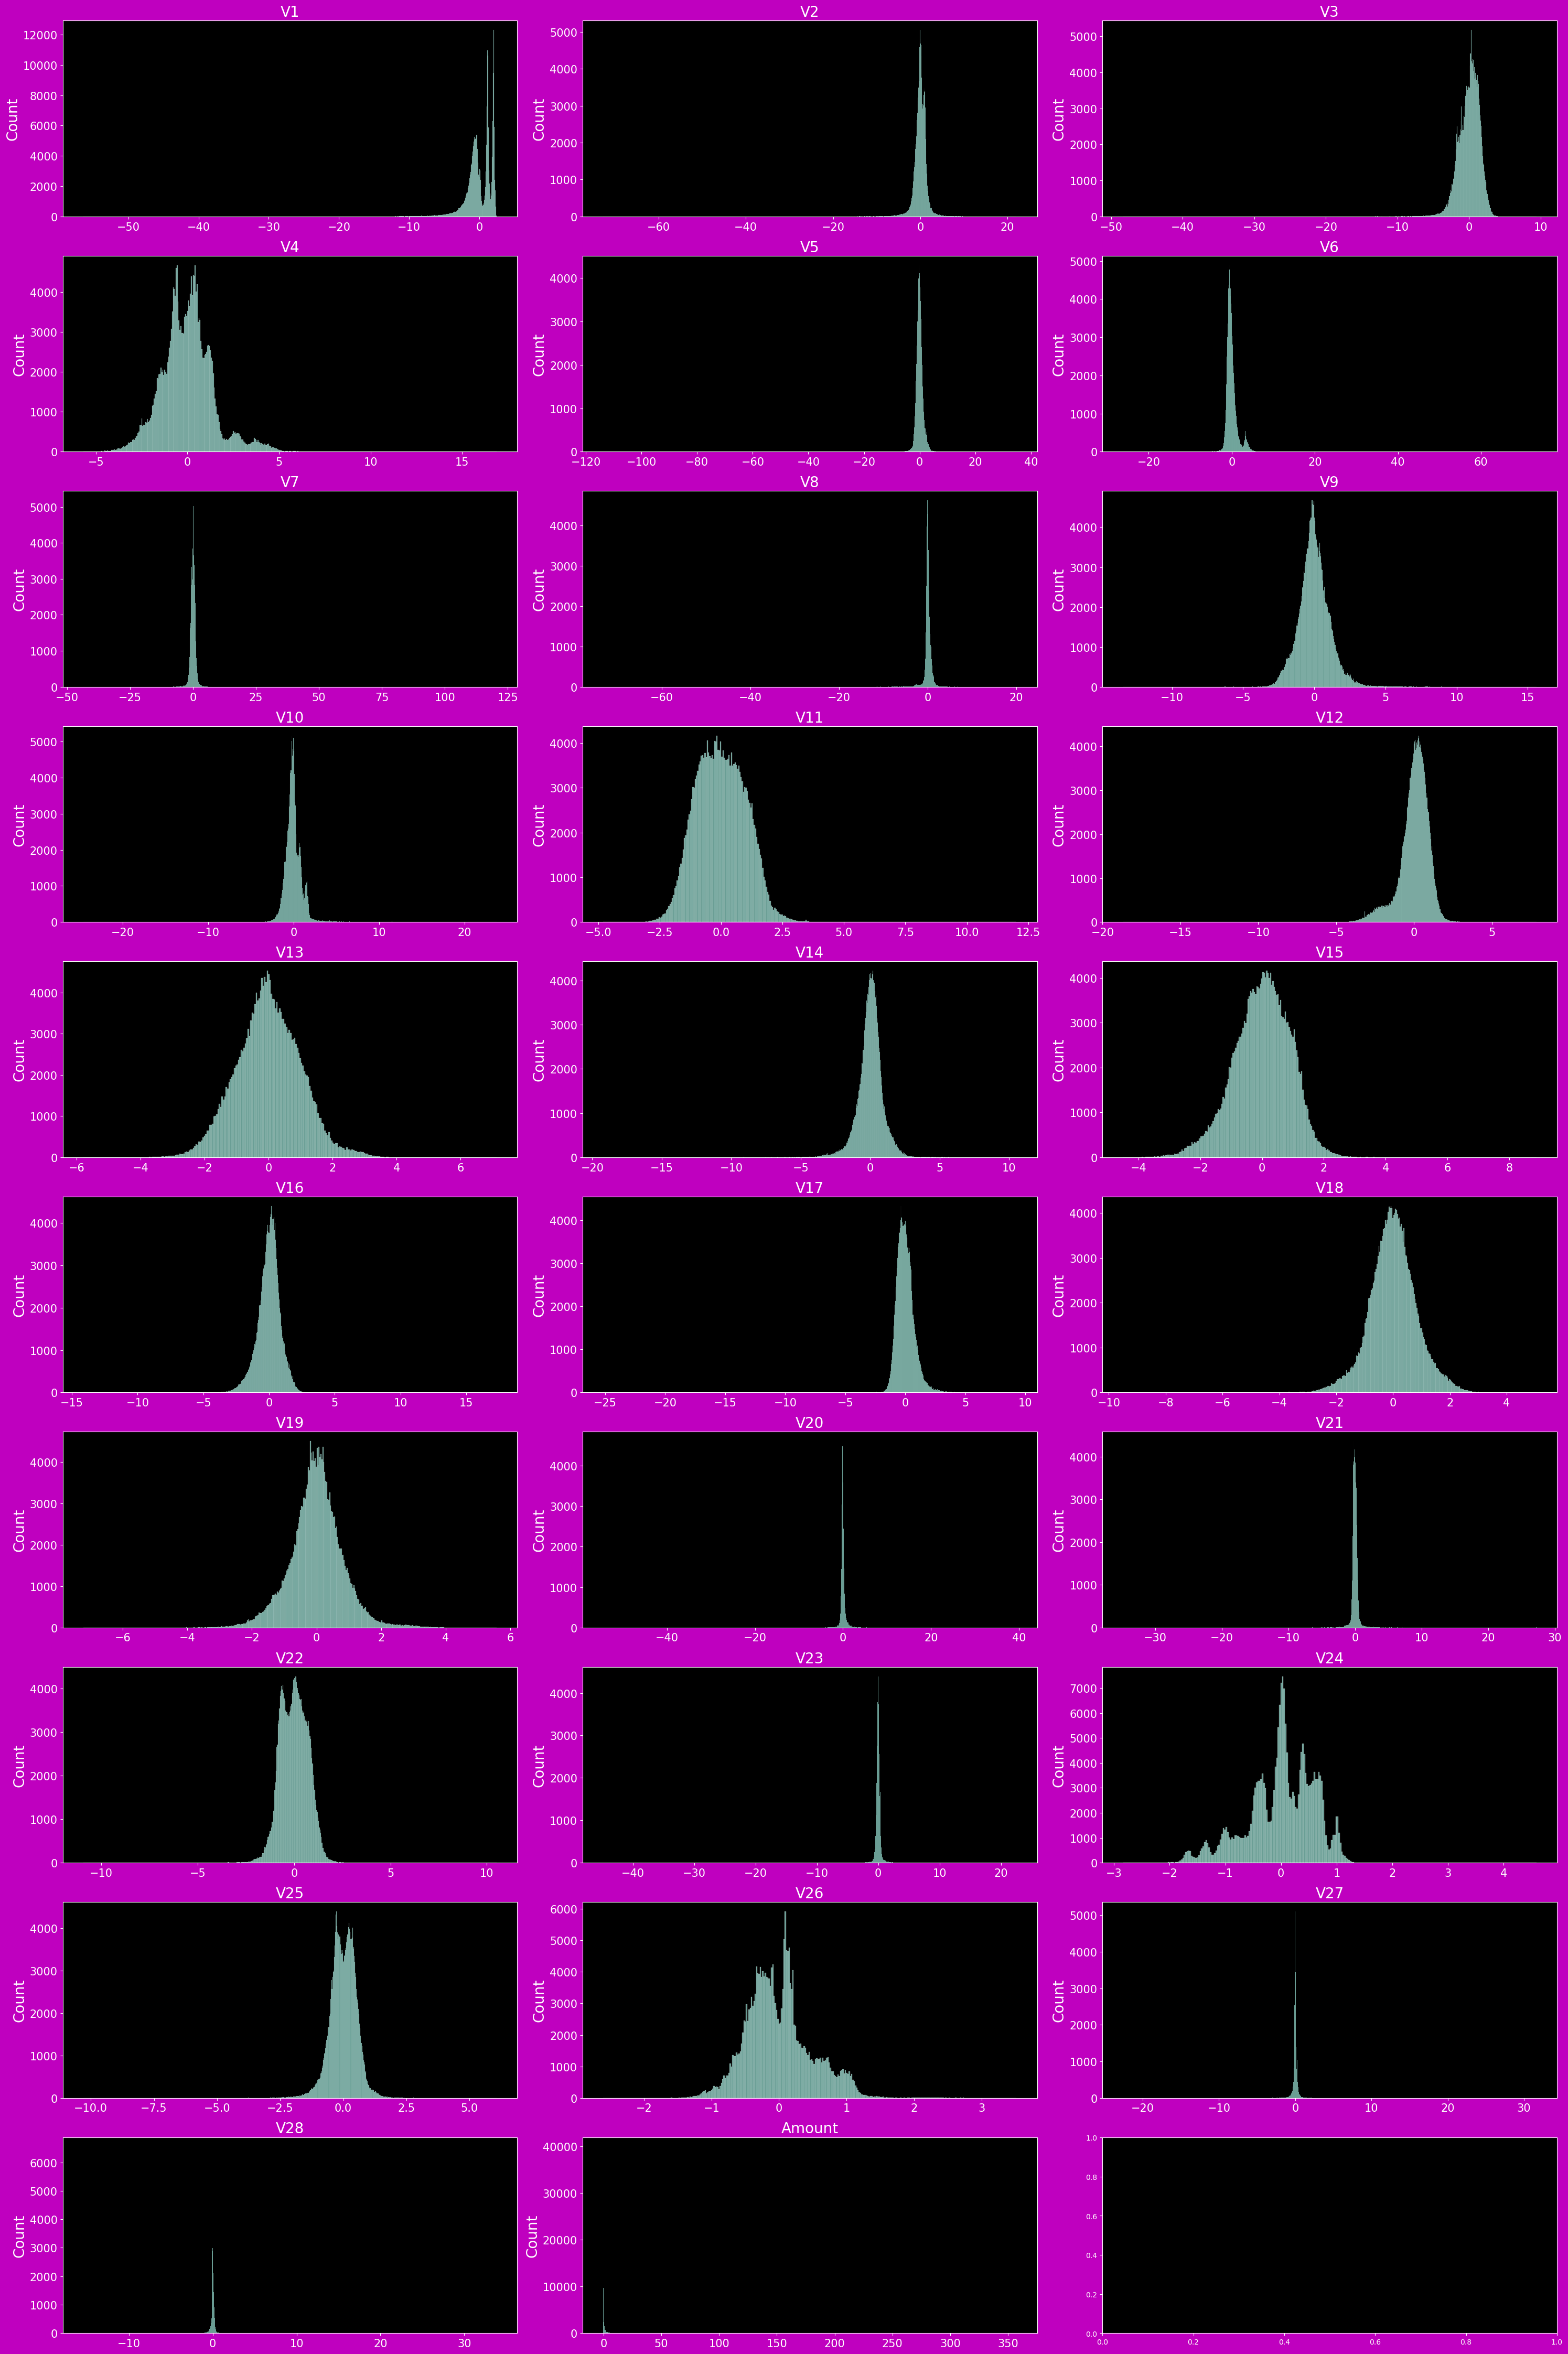

In [18]:
"""
The code defines a function to plot histograms of the variables in a given dataset to see the skewness.

"""

var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20) 
            ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15) 
            ax.set_xlabel('') # set empty string as x label of the subplot

    plt.tight_layout()
    plt.show()


Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [16]:
# Lets check the skewness of the features

"""
The code first creates a list of variable names called var, and then calculates the skewness of each variable using the skew() method of a Pandas DataFrame. 
The skewness values are stored in a list called skew_list.
"""
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


There is skewness present in the distribution of the above features:

* Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian

In [17]:
# Filtering the features which has skewness less than -1 and greater than +1
"""
This is a good way to identify which features may need to be transformed to improve model performance.
"""
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

# Treating Skewness
### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:

# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [19]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


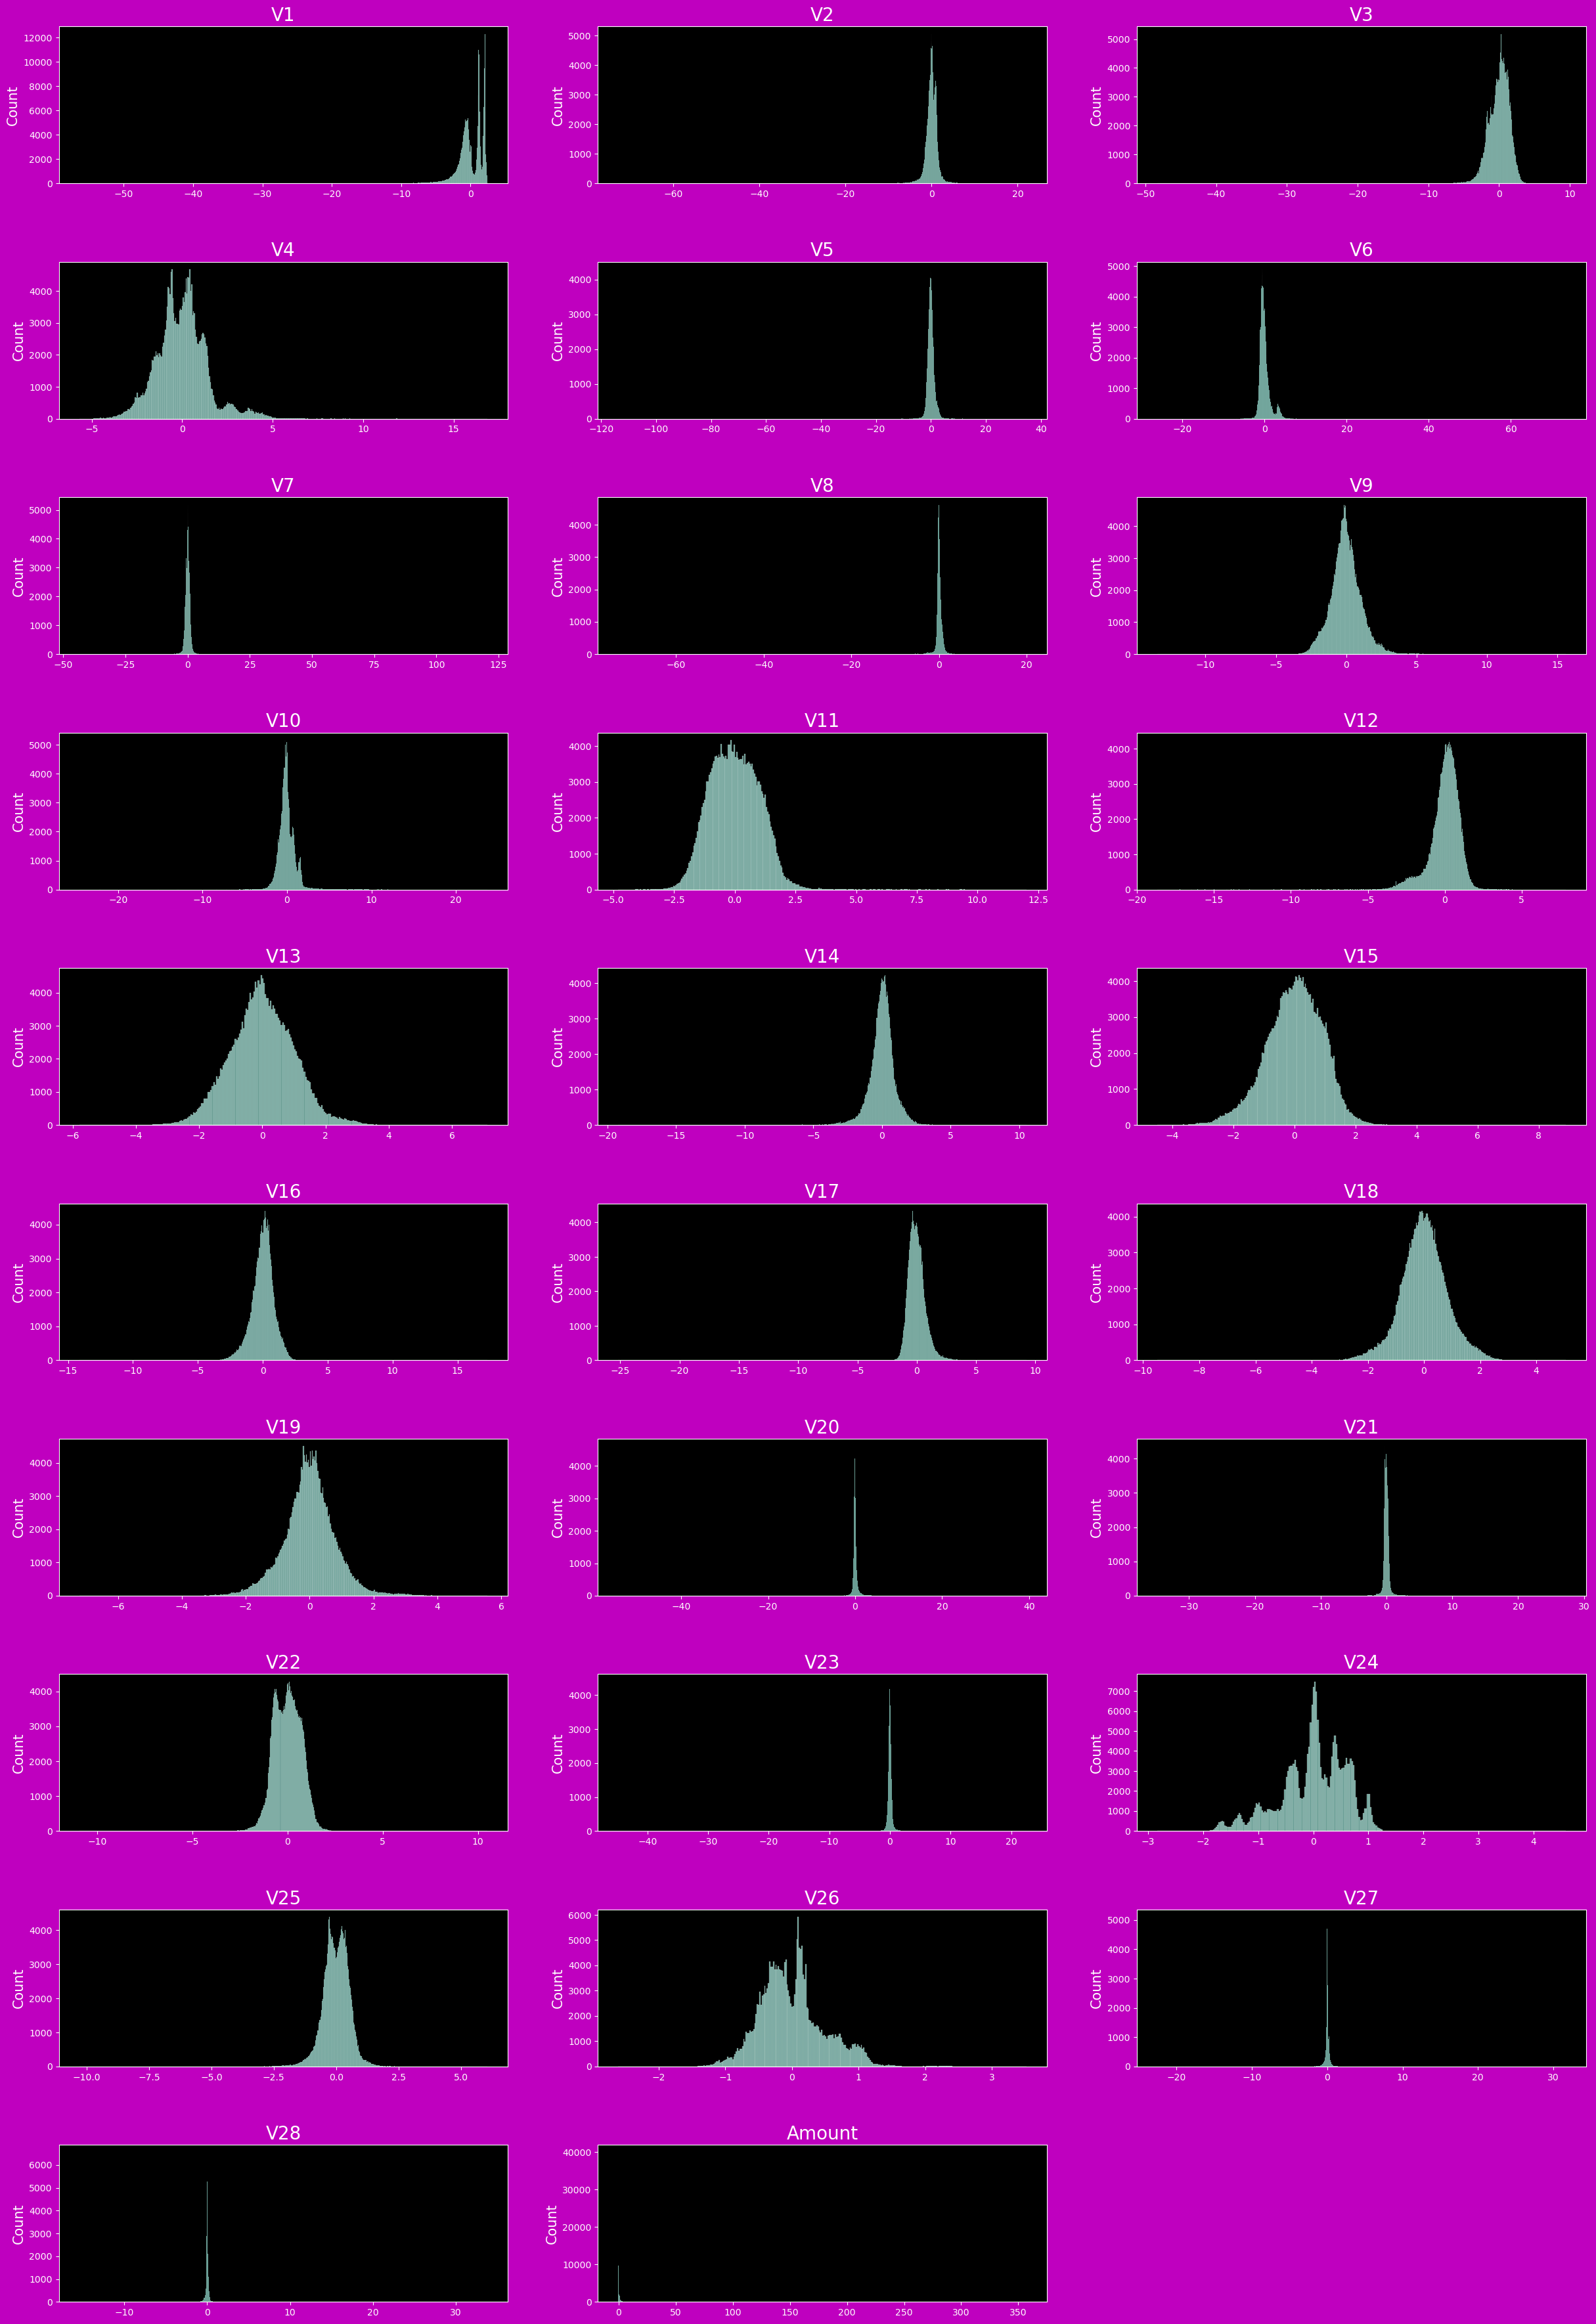

In [23]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='m') # create figure instance
    # fig.suptitle('Histograms of Variables', fontsize=30) # set main title of the figure
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i) # create subplot
        sns.histplot(X_train[col], ax=ax) # plot histogram
        ax.set_title(col, fontsize=20) # set title of the subplot
        ax.set_ylabel('Count', fontsize=15) # set ylabel of the subplot
        ax.set_xlabel('') # set empty string as x label of the subplot
    fig.subplots_adjust(hspace=0.5, wspace=0.2) # add horizontal and vertical space between subplots
    plt.show()

# Model Building with imbalanced data

We are going to build models on below mentioned algorithms and we will compare for the best model. Skipped models process is computationally very expensive when we have very large data set. We do not have these resource available so we are skipping these models. Working with below models:


1. Logistic Regression
2. KNN
3. Decision Tree


* When the data is imbalanced or less, it is better to use K-Fold Cross Validation for evaluating the performance when the data set is randomly split into ‘k’ groups.
* Stratified K-Fold Cross Validation is an extension of K-Fold cross-validation, in which you rearrange the data to ensure that each fold is a good representative of all the strata of the data.

#### Metric selection on imbalance data
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.



In [20]:
# Class imbalance
y_train.value_counts()/y_train.shape

Class
0   0.998271
1   0.001729
Name: count, dtype: float64

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

#### Tasks
- perform cross validation
- perform hyperparameter tuning
- print the evaluation result by choosing a evaluation metric
- print the optimum value of hyperparameters

# **Create Stratified Cross Validation Scheme & Do gridSearchCV after narrowing the range of best model**



* When the data is imbalanced or less, it is better to use K-Fold Cross Validation for evaluating the performance when the data set is randomly split into ‘k’ groups.
* Stratified K-Fold Cross Validation is an extension of K-Fold cross-validation, in which you rearrange the data to ensure that each fold is a good representative of all the strata of the data.
* When you have a small data set, the computation time will be manageable to test out different hyperparameter combinations. In this scenario, it is advised to use a grid search.
* However, with large data sets, it is advised to use a randomised search because the sampling will be random and not uniform. 

In [21]:
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

 In general, taking the maximum ROC-AUC score may be appropriate if your goal is to select the best model. However, taking the mean ROC-AUC score is generally a more robust and reliable way to compare models, especially if you are using cross-validation to estimate performance.

The reason why taking the maximum ROC-AUC score may not be as reliable is that it can be sensitive to small fluctuations in the data or the model, which can lead to overfitting. For example, if you have a small dataset, taking the maximum ROC-AUC score may not be as reliable because the score can vary significantly depending on the particular set of examples that are included in each fold. Similarly, if you have a highly variable model (e.g., a model with high variance), taking the maximum ROC-AUC score may not be as reliable because it may be overly optimistic about the true performance of the model.

On the other hand, taking the mean ROC-AUC score can be more robust because it smooths out the variability in the data and the model. By taking the mean of the scores across multiple folds, you are more likely to get a reliable estimate of the true performance of the model. Additionally, taking the mean ROC-AUC score can be useful for model selection, as it allows you to compare models in a more systematic and reliable way.

# `1. Logistic Regression`

#### ` Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

In [22]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameters for Stratified K-fold cross vaidation


params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True) 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Time taken: 35.15 seconds
Best ROC AUC score:  0.9812052138770543
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [23]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9812052138770543
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9797969874466093
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9790668817700007

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.007670919641509045
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.009179067053040193
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.009651062780020628


* We're seeing a nan value for the score when using the GridSearchCV function in scikit-learn, it typically indicates that the model did not converge or encountered some numerical instability during the training process.

  This can happen for a variety of reasons, such as 
    * an insufficient number of iterations, 
    * a learning rate that's too high or too low, 
    * or a dataset that has features with a wide range of values.



---



# `2. KNN Classifier`


#### `B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

* Euclidean distance is a good choice for problems where the variables have similar importance and are measured in the same scale. On the other hand, Manhattan distance is a good choice when variables have different scales or when you want to penalize differences in some variables more heavily than others.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameters for Stratified K-fold cross vaidation
"""
This code performs hyperparameter tuning using K-fold cross-validation for logistic regression. 
The parameter grid being searched is defined in params, with C being the regularization parameter for logistic regression. 
folds is an object that defines how many folds should be used in cross-validation.
"""

# Define the parameter grid for KNN
params = {'n_neighbors': [3,5, 7, 9], 'metric': ['euclidean', 'manhattan']}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True) 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)




---



# `3. Decision Tree`


#### ` Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score`

* setting a maximum depth for the tree is a form of regularization that can help prevent overfitting. However, setting the maximum depth too low may result in underfitting and reduced model performance. Therefore, the optimal value of max_depth depends on the complexity of the problem and the available data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters to be tuned
params = {'max_depth': [2, 3, 4],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()

# Print the time taken to fit the model
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)


In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)




---



# Final Observation on Imbalanced Dataset



#### `A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data`

* **LogisticRegression** {'C': 0.01, 'penalty': 'l2'} = 
  * Best Mean ROC-AUC score for val data: 0.9797969874466093
  * Mean precision val score for best C: 0.885478588591554
  * Mean recall val score for best C: 0.6295975017349064
  * Mean f1 val score for best C: 0.7341406860856002


* **KNeighborsClassifier** {'metric': 'manhattan', 'n_neighbors': 9} = 
  * 0.9274613536399045


* **DecisionTreeClassifier** {'criterion': 'entropy', '': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 
  * Best Mean ROC-AUC score for val data: 0.9337472016466822
  * Mean precision val score for best max_depth: 0.8480952241800844
  * Mean recall val score for best max_depth: 0.71578379211967
  * Mean f1 val score for best max_depth: 0.7752315571186218





---



---


# **Evaluation over Test Set**

Proceed with the model which shows the best result
* Apply the best hyperparameter on the model
* Predict on the test dataset

In [24]:
X_test_saved.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.000000
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.850000
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.070000
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.990000
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.500000


In [25]:
y_test_saved.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

In [26]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [27]:
X_test_saved.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.014079
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.142897
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.761228
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.295791
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.288610


In [28]:
"""
The code appears to be initializing and training several classification models with best hyperparameters and 
then evaluating their performance using ROC-AUC score.

Each model is trained on the same training data (X_train_pt and y_train_pt) and 
then used to predict the probability of the target class (y) for the test data (X_test_pt). 
The predicted probabilities are then used to calculate the ROC-AUC score, which is a measure of the 
model's ability to distinguish between positive and negative samples.

The ROC-AUC score for each model is printed to the console.
"""

from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)  
clf.fit(X_train_pt, y_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))


print("============================================================================================================")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')  
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)   
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")





LogisticRegression ROC-AUC Score on Test Set = 0.9752271441778737
LogisticRegression F1-Score on Test Set = 0.5977011494252873
LogisticRegression Precision on Test Set = 0.4785276073619632
LogisticRegression Recall on Test Set = 0.7959183673469388
Time taken: 4.43 seconds


AttributeError: 'Flags' object has no attribute 'c_contiguous'

#### `B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set`

* **LogisticRegression** {'C': 0.01, 'penalty': 'l2'} = 
  * LogisticRegression ROC-AUC Score on Test Set = 0.9752271441778737
  * LogisticRegression F1-Score on Test Set = 0.5977011494252873
  * LogisticRegression Precision on Test Set = 0.4785276073619632
  * LogisticRegression Recall on Test Set = 0.7959183673469388 

* **KNeighborsClassifier** {'metric': 'manhattan', 'n_neighbors': 9} = 
  * KNeighbors Classifier ROC-AUC Score on Test Set = 0.9385655570613163
  * KNeighbors Classifier F1-Score on Test Set = 0.824858757062147
  * KNeighbors Classifier Precision on Test Set = 0.9240506329113924
  * KNeighbors Classifier Recall on Test Set = 0.7448979591836735


* **DecisionTreeClassifier** {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 
  * **Decision Tree Classifier** ROC-AUC Score on Test Set = 0.9314465304973987
  * Decision Tree Classifier F1-Score on Test Set = 0.8200000000000001
  * Decision Tree Classifier Precision on Test Set = 0.803921568627451
  * Decision Tree Classifier Recall on Test Set = 0.8367346938775511

`Best model is LogisticRegression`


### **Table of Scores**

| Model                    | Parameter                                               | ROC-AUC Score | F1-Score   | Precision  | Recall     |
|--------------------------|--------------------------------------------------------|--------------|------------|------------|------------|
| LogisticRegression       | {'C': 0.01, 'penalty': 'l2'}                         | 0.975227144  | 0.59770115 | 0.47852761 | 0.79591836 |
| KNeighborsClassifier     | {'metric': 'manhattan', 'n_neighbors': 9}              | 0.938565557  | 0.82485875 | 0.92405063 | 0.74489795 |
| DecisionTreeClassifier   | {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} | 0.931446530  | 0.82000000 | 0.80392156 | 0.83673469 |



1. `Best model is LogisticRegression based on ROC-AUC Score`
2. `Best model is KNN Classifier based on F1 Score`




---

